In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

In [32]:
# Read the CSV file into a DataFrame
df = pd.read_csv('trajectories_raw.csv')

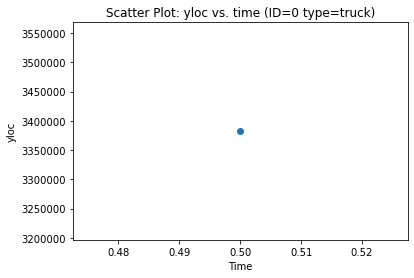

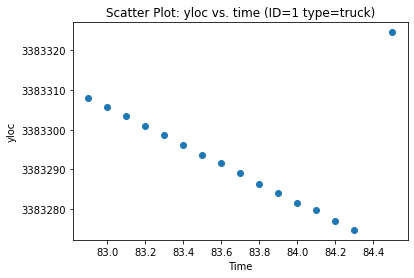

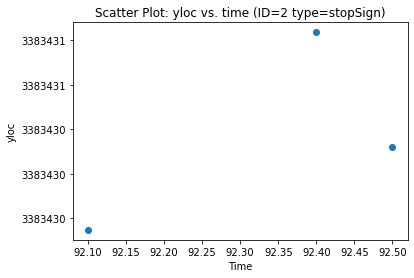

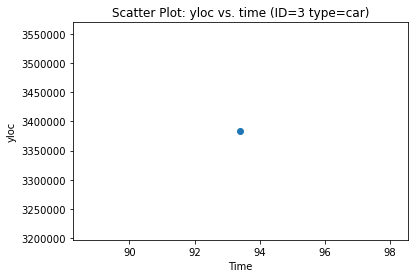

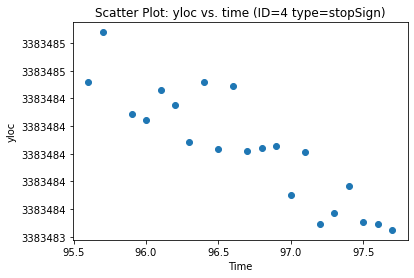

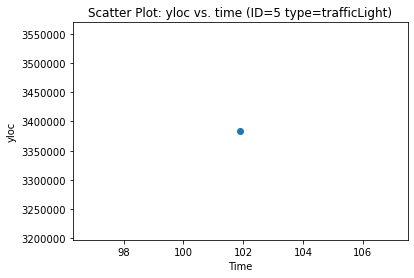

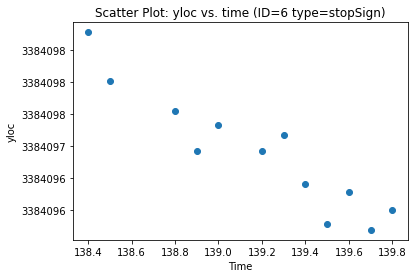

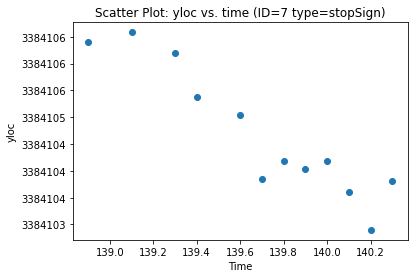

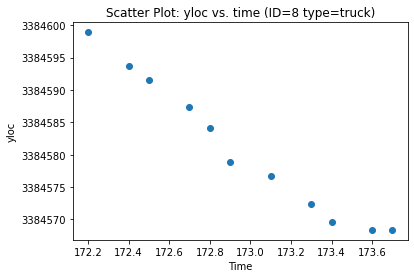

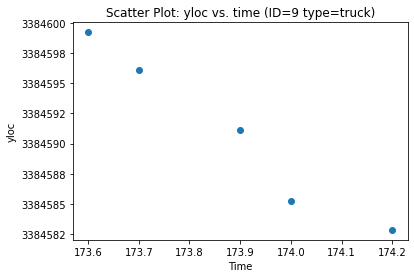

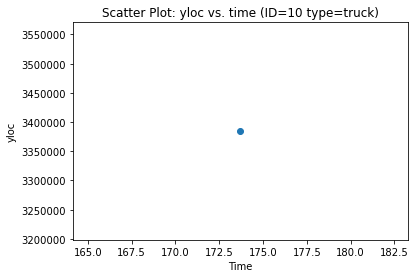

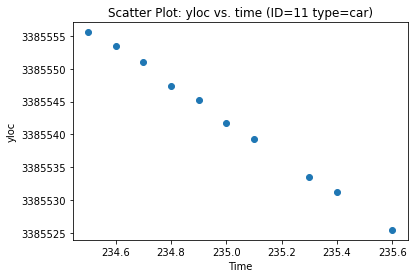

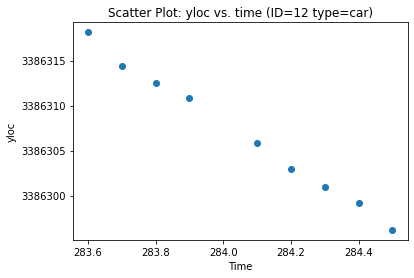

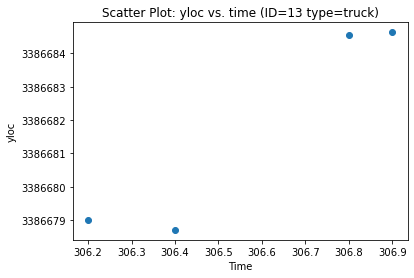

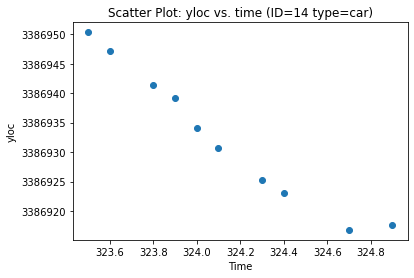

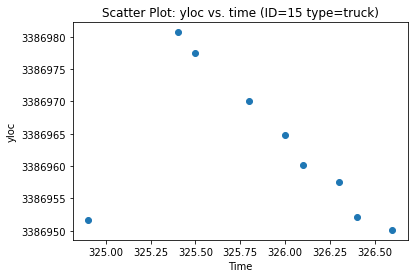

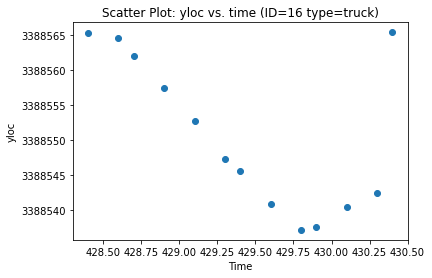

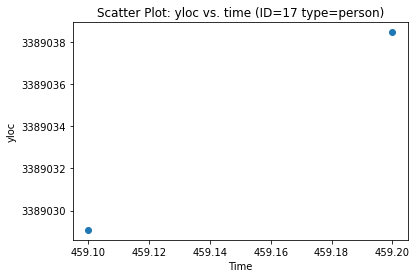

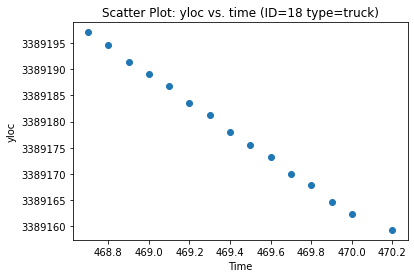

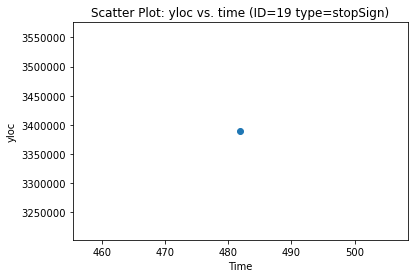

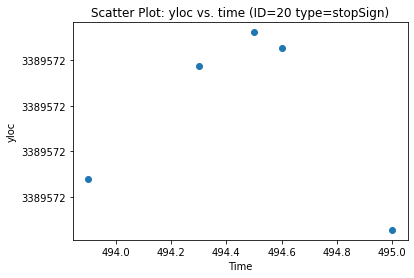

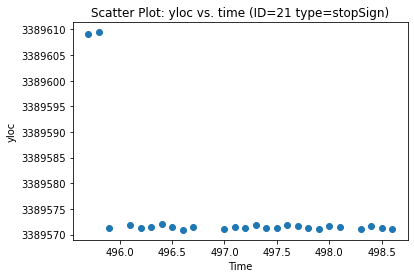

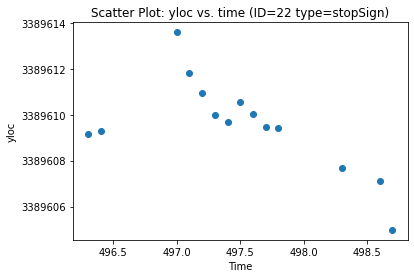

In [33]:
# Group by ID
groups = df.groupby('ID')
outputDir = 'yolo_raw_plt/'
os.makedirs(outputDir, exist_ok=True)


# Task 1: Scatter plot yloc vs. time for each ID
for id, group in groups:
    fig, ax = plt.subplots()
    ax.scatter(group['time'], group['yloc'])
    ax.set_xlabel('Time')
    ax.set_ylabel('yloc')
    ax.set_title(f'Scatter Plot: yloc vs. time (ID={id} type={group["type"].iloc[0]})')

    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%1.f"%x))

    plt.savefig(f'{outputDir}y-t-{id}-{group["type"].iloc[0]}')
    plt.show()

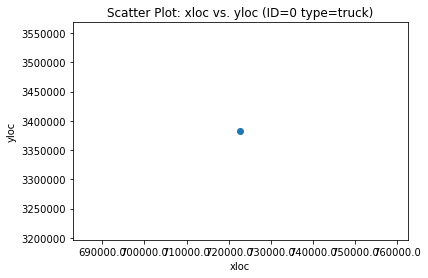

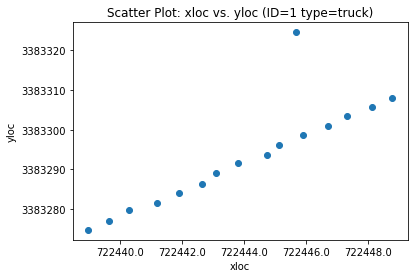

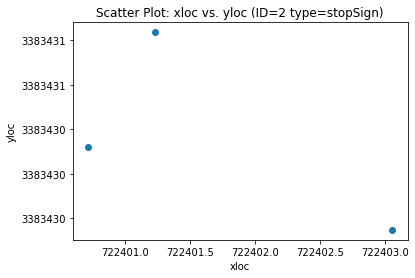

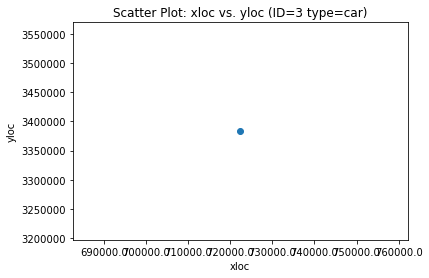

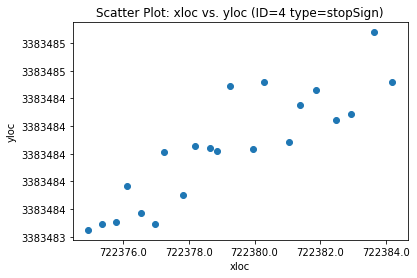

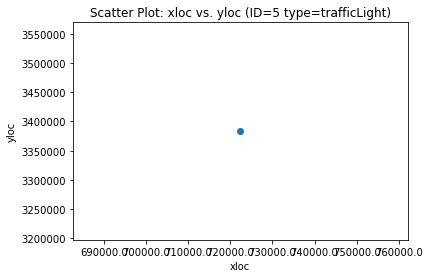

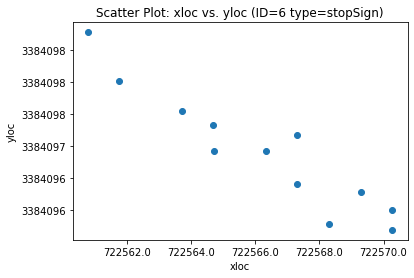

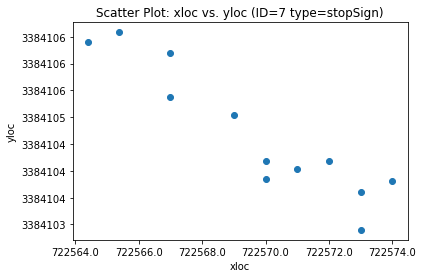

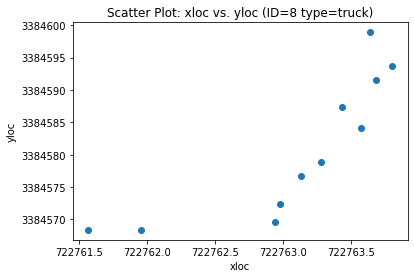

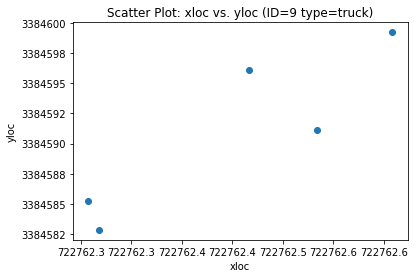

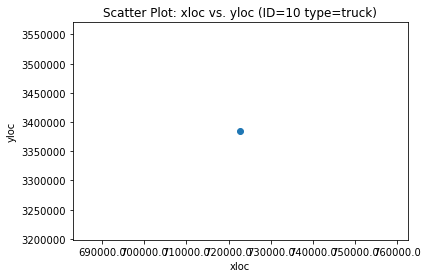

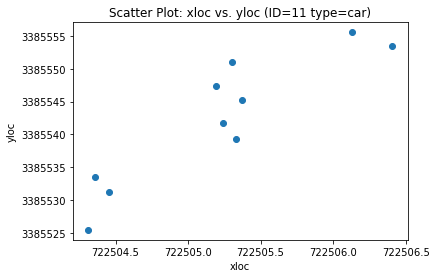

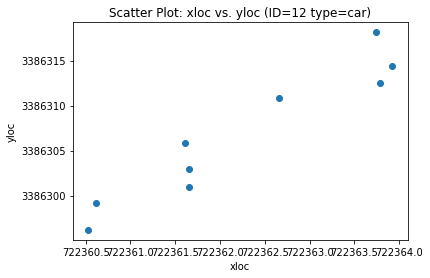

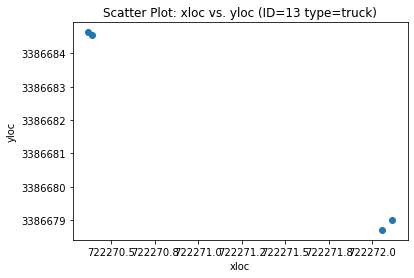

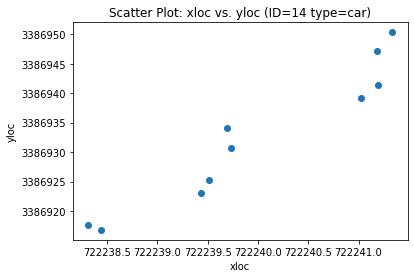

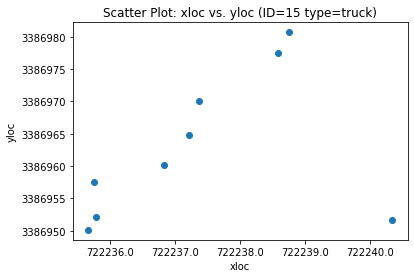

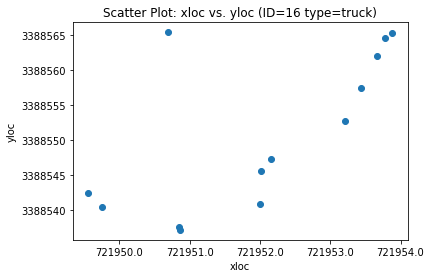

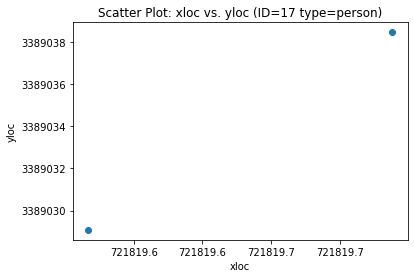

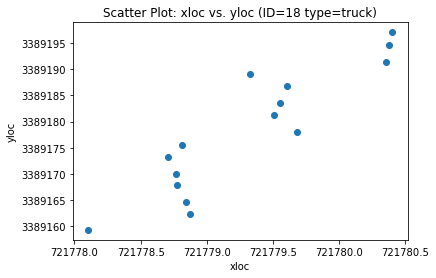

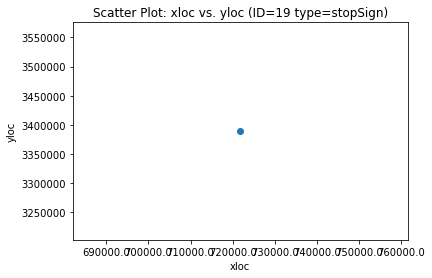

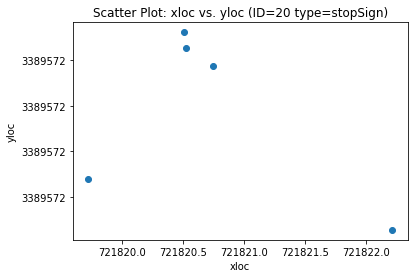

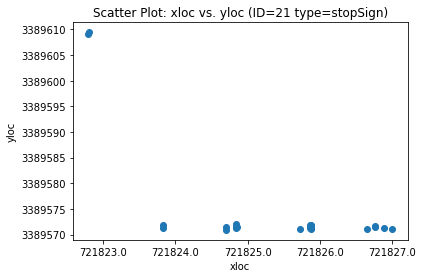

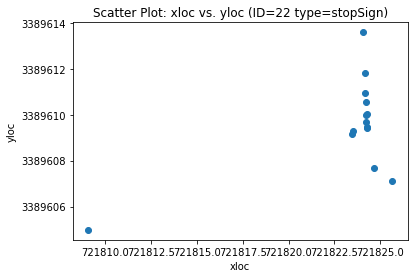

In [28]:
# Group by ID
groups = df.groupby('ID')
outputDir = 'yolo_raw_plt/'
os.makedirs(outputDir, exist_ok=True)

# Task 2: Scatter plot xloc vs. yloc for each ID
for id, group in groups:
    fig, ax = plt.subplots()
    ax.scatter(group['xloc'], group['yloc'])
    ax.set_xlabel('xloc')
    ax.set_ylabel('yloc')
    ax.set_title(f'Scatter Plot: xloc vs. yloc (ID={id} type={group["type"].iloc[0]})')

    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%0.1f"%x))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%1.f"%x))

    plt.savefig(f'{outputDir}y-x-{id}-{group["type"].iloc[0]}')

    plt.show()

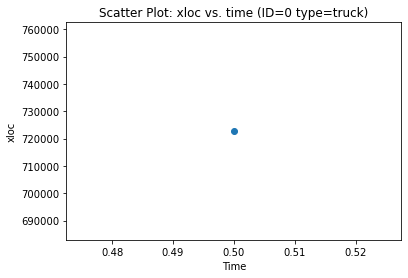

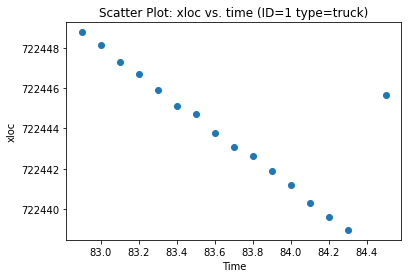

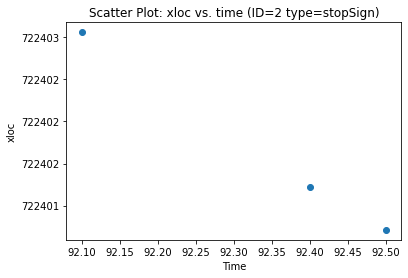

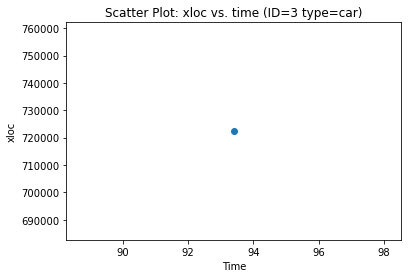

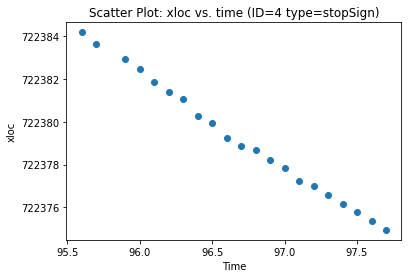

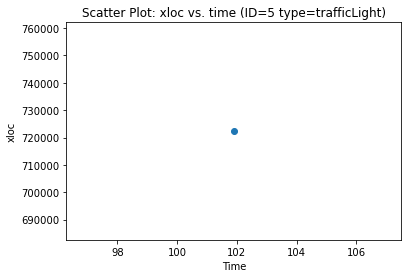

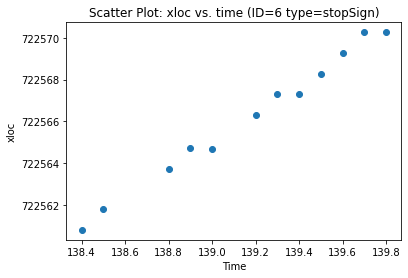

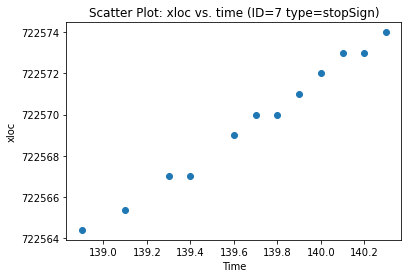

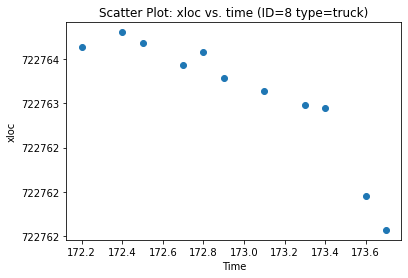

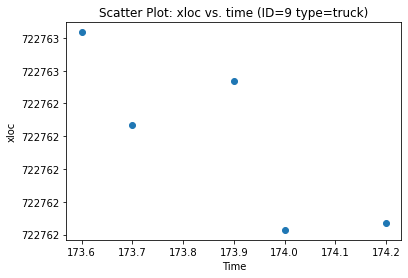

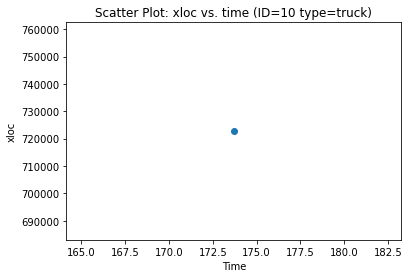

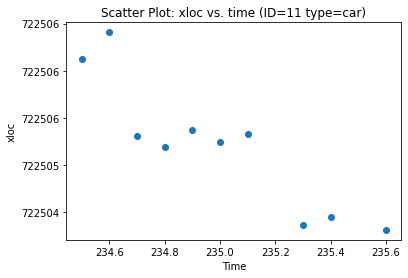

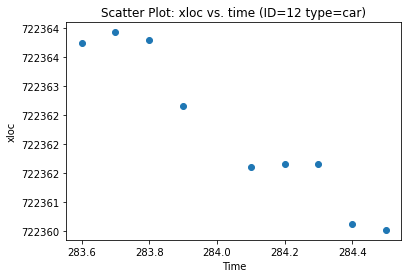

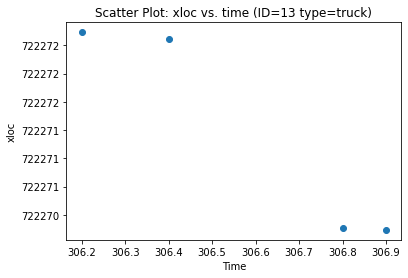

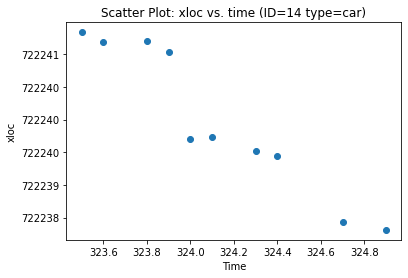

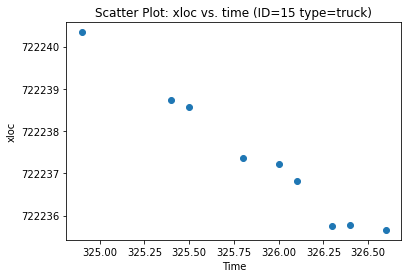

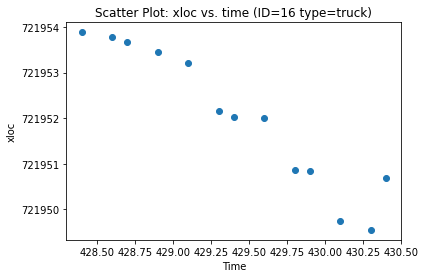

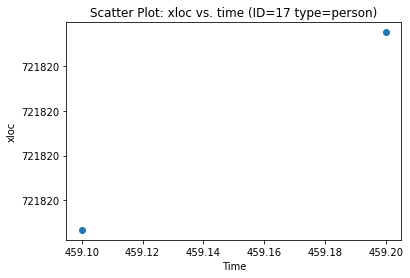

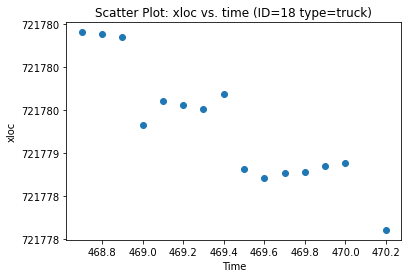

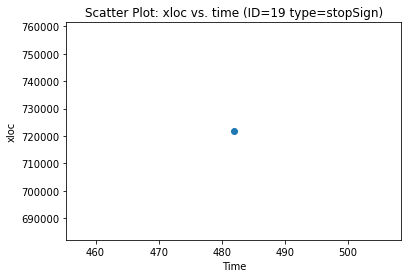

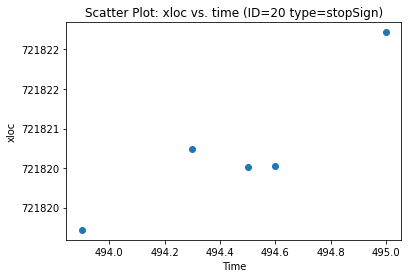

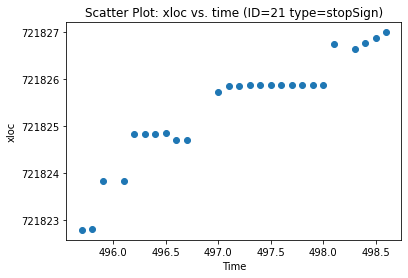

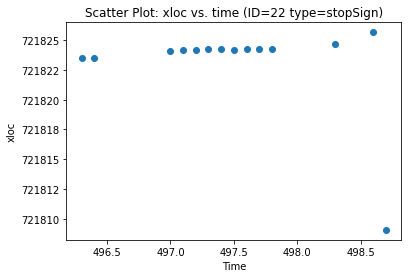

In [29]:
# Group by ID
groups = df.groupby('ID')
outputDir = 'yolo_raw_plt/'
os.makedirs(outputDir, exist_ok=True)


# Task 1: Scatter plot yloc vs. time for each ID
for id, group in groups:
    fig, ax = plt.subplots()
    ax.scatter(group['time'], group['xloc'])
    ax.set_xlabel('Time')
    ax.set_ylabel('xloc')
    ax.set_title(f'Scatter Plot: xloc vs. time (ID={id} type={group["type"].iloc[0]})')

    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%1.f"%x))

    plt.savefig(f'{outputDir}x-t-{id}-{group["type"].iloc[0]}')
    plt.show()

## After clean by hand, delete some outliers

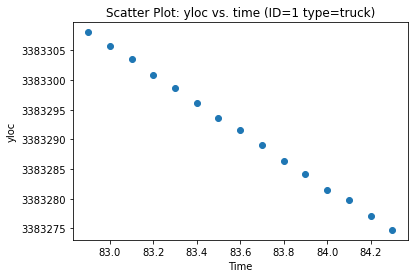

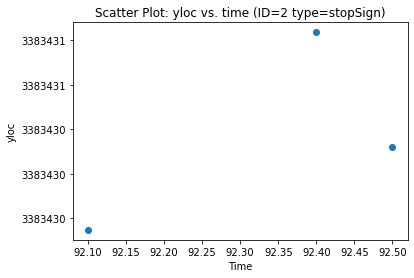

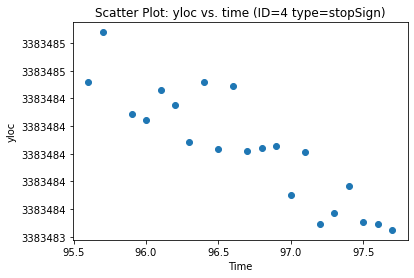

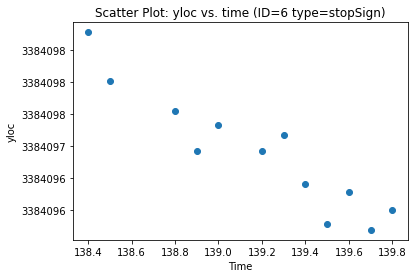

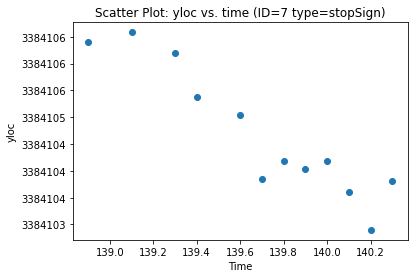

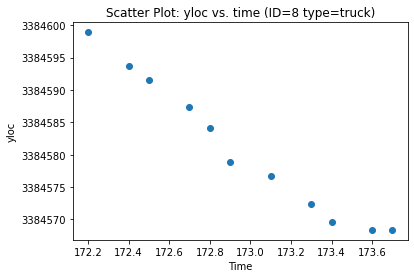

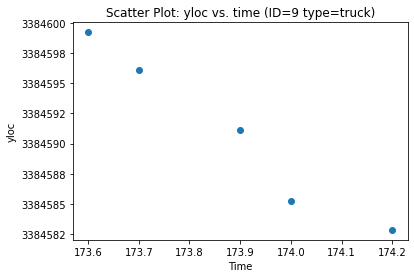

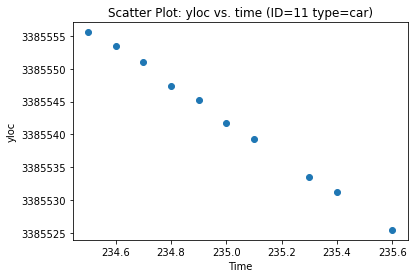

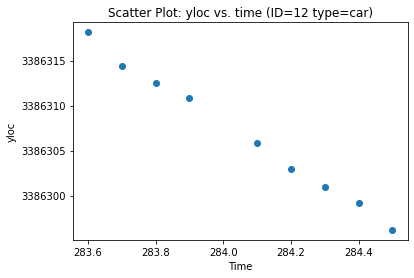

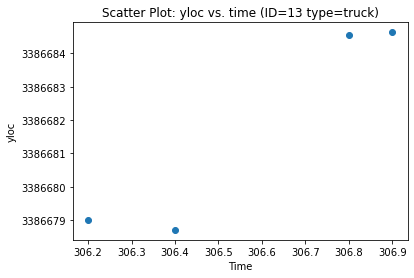

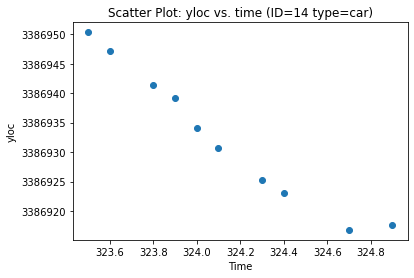

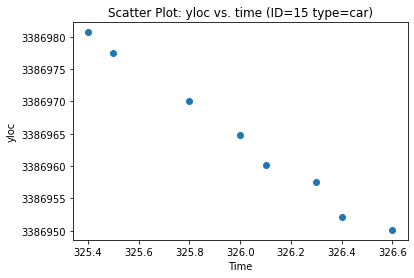

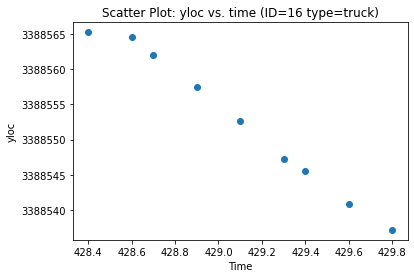

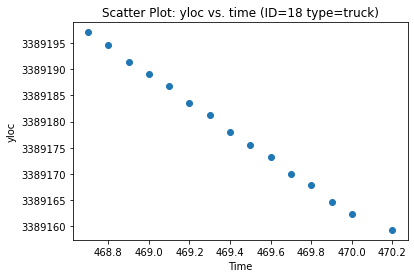

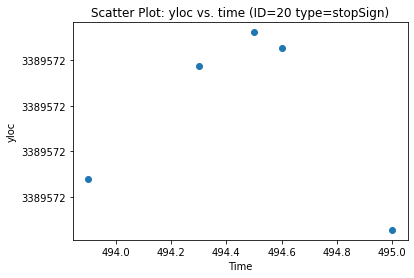

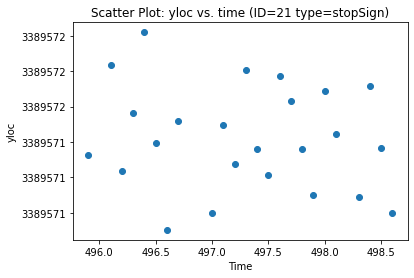

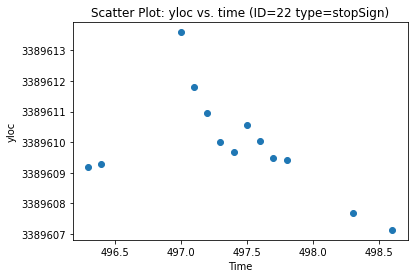

In [31]:
# Read the CSV file into a DataFrame
df = pd.read_csv('trajectories_cleanbyhand.csv')

# Group by ID
groups = df.groupby('ID')
outputDir = 'yolo_raw_plt/'
os.makedirs(outputDir, exist_ok=True)


# Task 1: Scatter plot yloc vs. time for each ID
for id, group in groups:
    fig, ax = plt.subplots()
    ax.scatter(group['time'], group['yloc'])
    ax.set_xlabel('Time')
    ax.set_ylabel('yloc')
    ax.set_title(f'Scatter Plot: yloc vs. time (ID={id} type={group["type"].iloc[0]})')

    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%1.f"%x))

    plt.show()

## Plot with ego waypoints as well

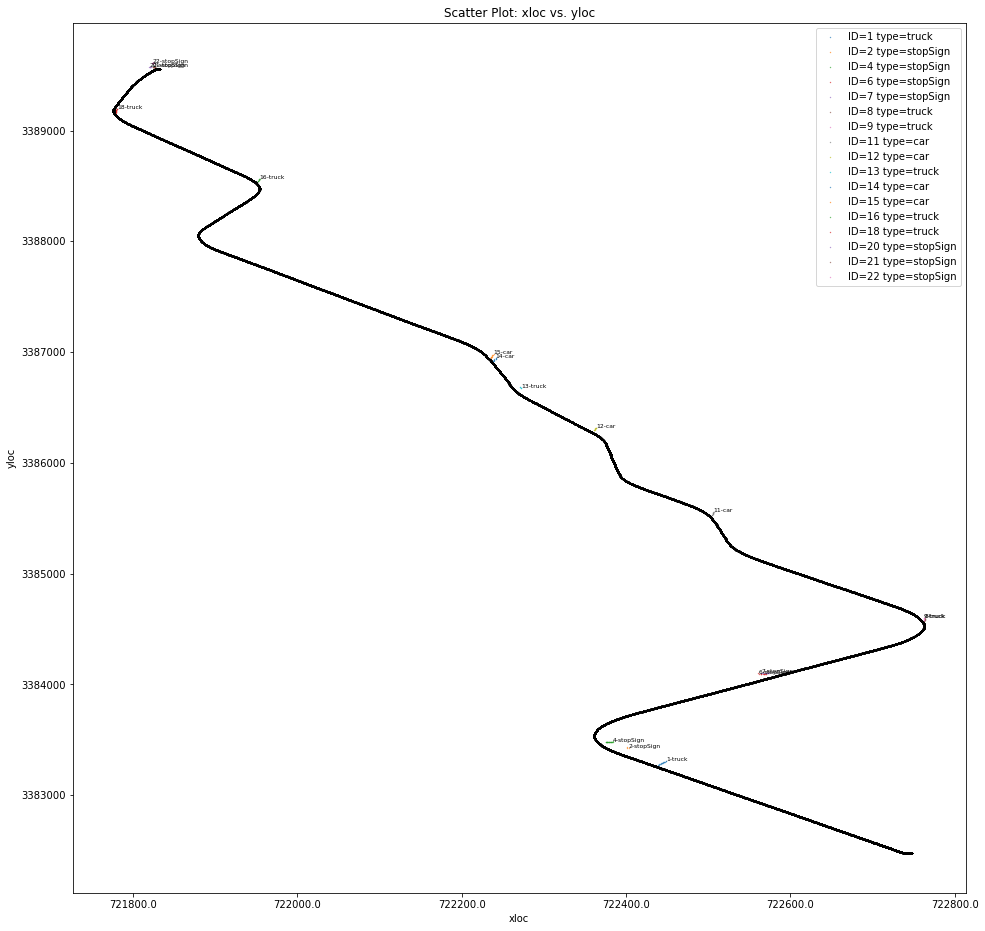

In [52]:
# Read the CSV file into a DataFrame
df = pd.read_csv('trajectories_cleanbyhand.csv')
ego_df = pd.read_csv('utm_corr.csv')

# Group by ID
groups = df.groupby('ID')
# outputDir = 'yolo_raw_plt/'
# os.makedirs(outputDir, exist_ok=True)

fig, ax = plt.subplots(figsize=(16,16))
for id, group in df.groupby('ID'):
    ax.scatter(group['xloc'], group['yloc'], label=f'ID={id} type={group["type"].iloc[0]}',s=0.1)
    # Add text label to the first point of each ID
    x = group['xloc'].iloc[0]
    y = group['yloc'].iloc[0]
    ax.text(x, y, f'{id}-{group["type"].iloc[0]}', fontsize=6)

ax.set_xlabel('xloc')
ax.set_ylabel('yloc')
ax.set_title('Scatter Plot: xloc vs. yloc')
ax.legend()

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%0.1f"%x))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%1.f"%x))

ax.scatter(ego_df['position_x'],ego_df['position_y'],color ='black', s=0.1)


plt.show()

## Additional cleaning, moving average

In [91]:
df = pd.read_csv('trajectories_cleanbyhand.csv')

# Delete Id with less than 5 datapoints
df = df.groupby('ID').filter(lambda x: len(x) > 5)

# Update xloc_new and yloc_new with average values for type "trafficLight" or "stopSign"
mask = df['type'].isin(['trafficLight', 'stopSign'])
df.loc[mask, 'xloc'] = df[mask].groupby('ID')['xloc'].transform('mean')
df.loc[mask, 'yloc'] = df[mask].groupby('ID')['yloc'].transform('mean')

window_size = 5  # Define the size of the moving average window

# Apply moving average smoothing for type "car" or "truck"
mask = df['type'].isin(['car', 'truck'])
df.loc[mask, 'xloc'] = df[mask].groupby('ID')['xloc'].rolling(window=window_size, min_periods=1, center=True).mean().reset_index(level=0, drop=True)
df.loc[mask, 'yloc'] = df[mask].groupby('ID')['yloc'].rolling(window=window_size, min_periods=1, center=True).mean().reset_index(level=0, drop=True)

df['ID'] = pd.factorize(df['ID'])[0]
df.to_csv('trajectory_smoothed.csv',index=False)

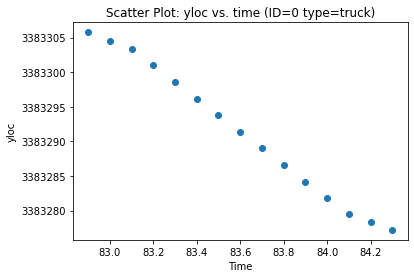

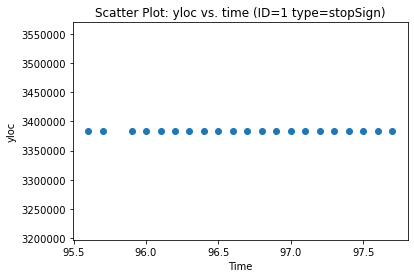

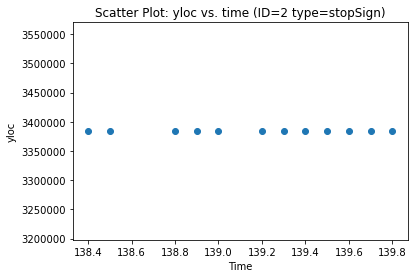

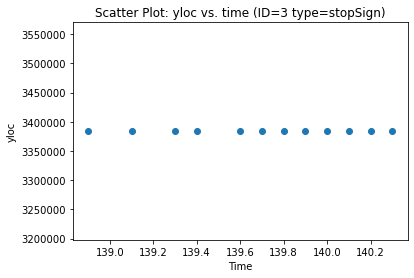

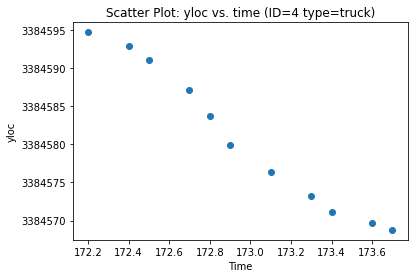

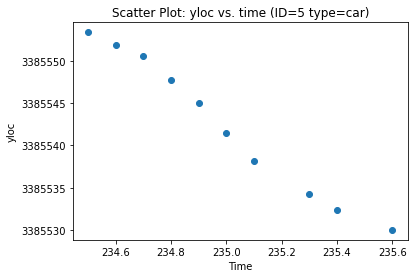

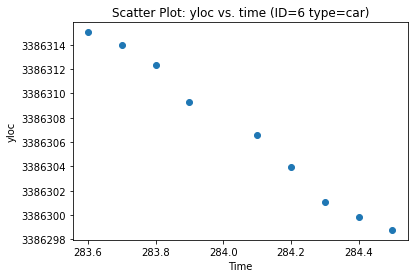

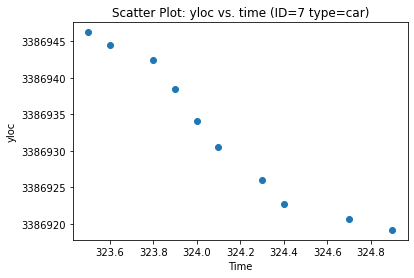

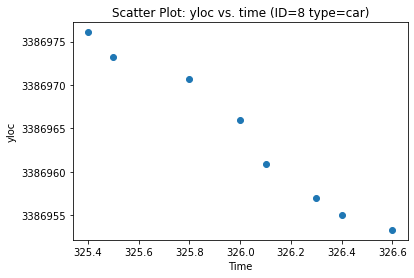

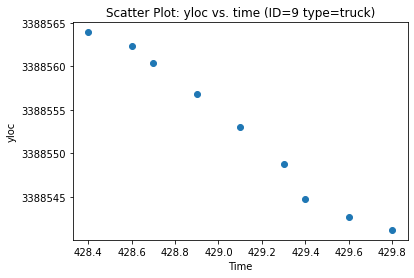

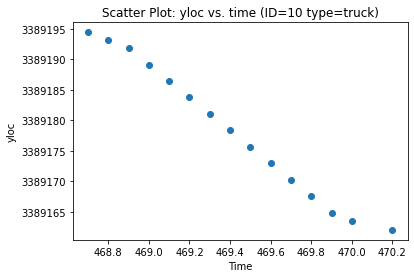

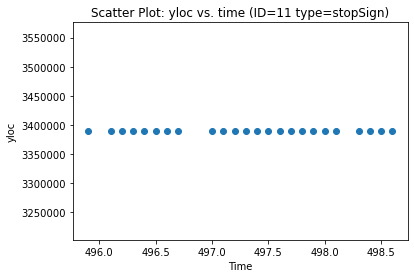

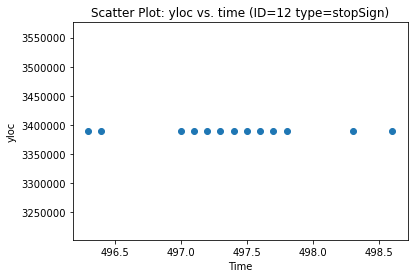

In [96]:
df = pd.read_csv('trajectory_smoothed.csv')

# Group by ID
groups = df.groupby('ID')
outputDir = 'yolo_smoothed_plt/'
os.makedirs(outputDir, exist_ok=True)


# Task 1: Scatter plot yloc vs. time for each ID
for id, group in groups:
    fig, ax = plt.subplots()
    ax.scatter(group['time'], group['yloc'])
    ax.set_xlabel('Time')
    ax.set_ylabel('yloc')
    ax.set_title(f'Scatter Plot: yloc vs. time (ID={id} type={group["type"].iloc[0]})')

    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%1.f"%x))

    plt.savefig(f'{outputDir}y-t-{id}-{group["type"].iloc[0]}.png', dpi=300)
    plt.show()

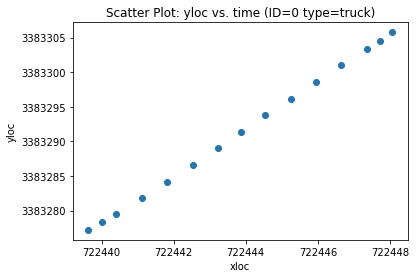

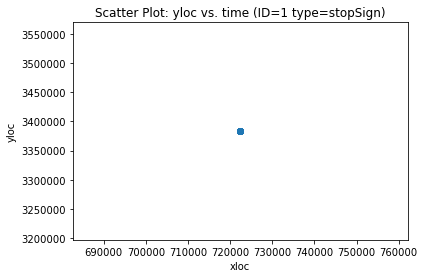

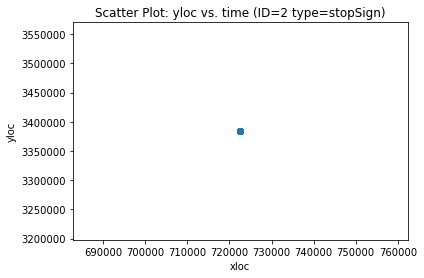

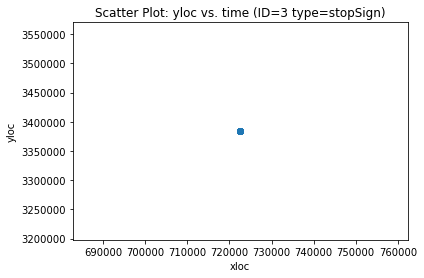

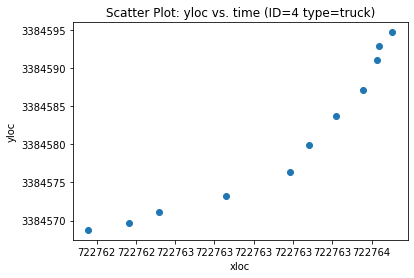

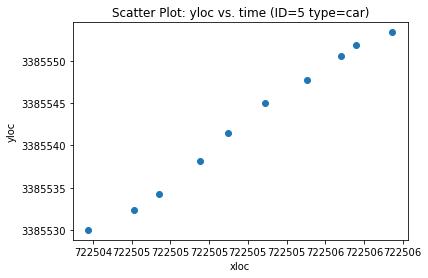

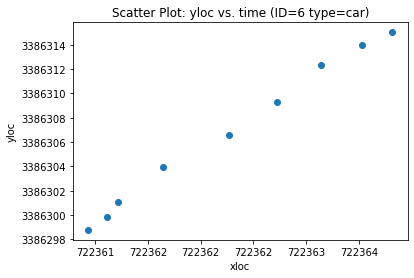

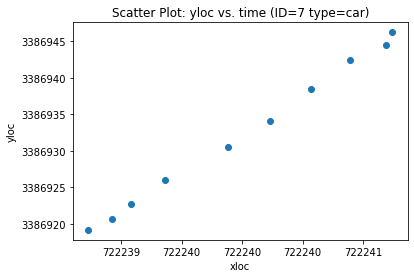

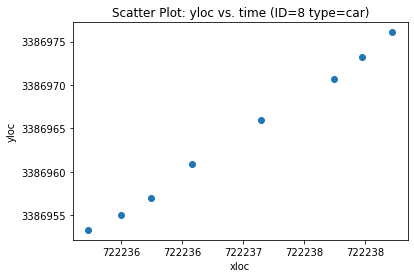

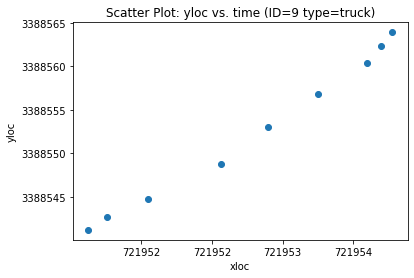

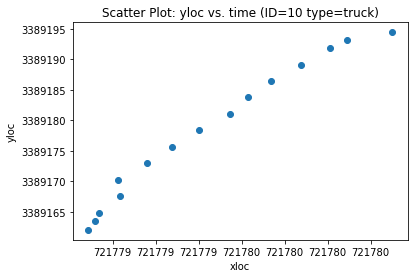

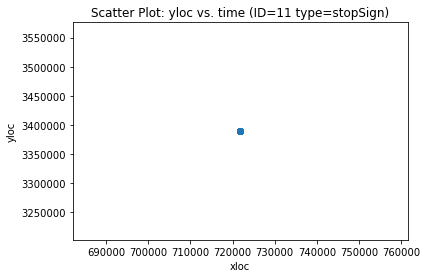

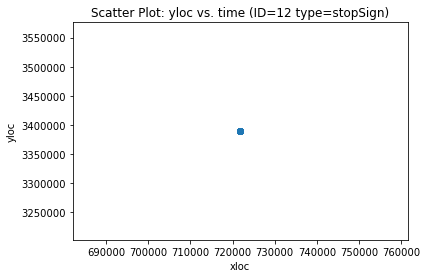

In [95]:
df = pd.read_csv('trajectory_smoothed.csv')

# Group by ID
groups = df.groupby('ID')
outputDir = 'yolo_smoothed_plt/'
os.makedirs(outputDir, exist_ok=True)

for id, group in groups:
    fig, ax = plt.subplots()
    ax.scatter(group['xloc'], group['yloc'])
    ax.set_xlabel('xloc')
    ax.set_ylabel('yloc')
    ax.set_title(f'Scatter Plot: yloc vs. time (ID={id} type={group["type"].iloc[0]})')

    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%1.f"%x))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%1.f"%x))

    plt.savefig(f'{outputDir}x-y-{id}-{group["type"].iloc[0]}.png', dpi=300)
    plt.show()

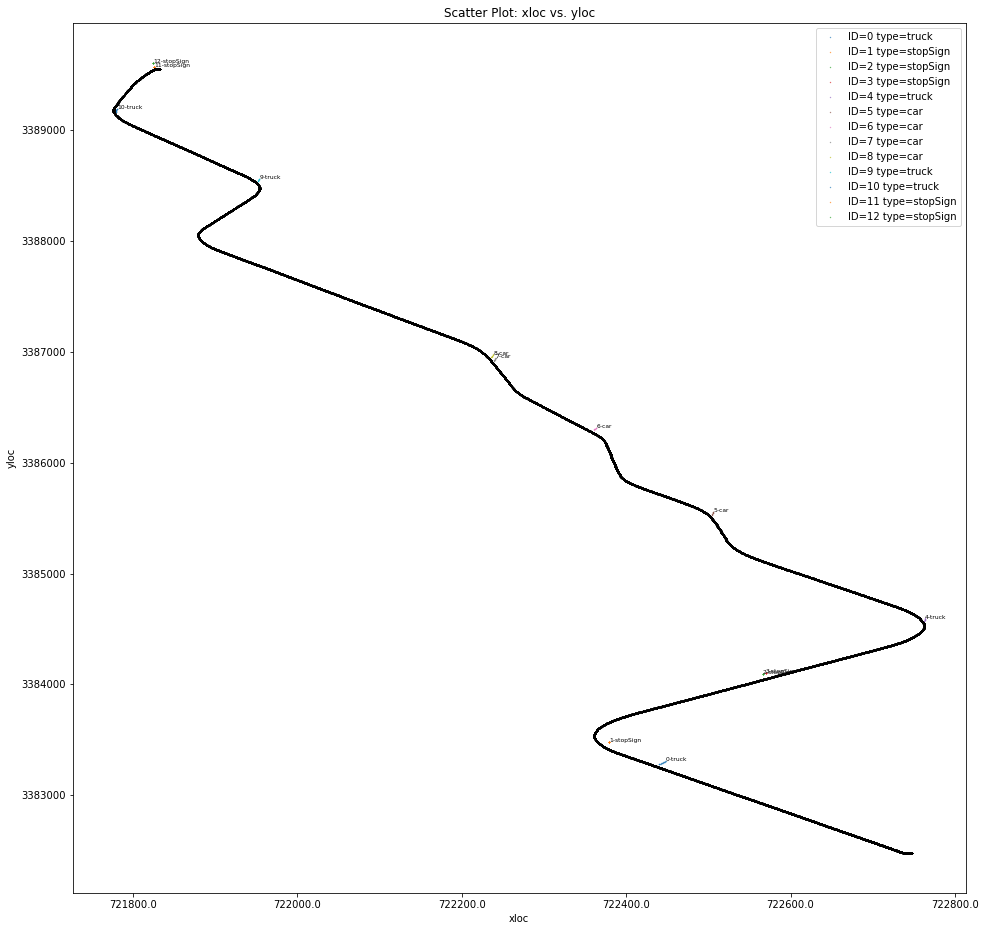

In [99]:
# Read the CSV file into a DataFrame
df = pd.read_csv('trajectory_smoothed.csv')
ego_df = pd.read_csv('utm_corr.csv')

# Group by ID
groups = df.groupby('ID')
# outputDir = 'yolo_raw_plt/'
# os.makedirs(outputDir, exist_ok=True)

fig, ax = plt.subplots(figsize=(16,16))
for id, group in df.groupby('ID'):
    ax.scatter(group['xloc'], group['yloc'], label=f'ID={id} type={group["type"].iloc[0]}',s=0.1)
    # Add text label to the first point of each ID
    x = group['xloc'].iloc[0]
    y = group['yloc'].iloc[0]
    ax.text(x, y, f'{id}-{group["type"].iloc[0]}', fontsize=6)

ax.set_xlabel('xloc')
ax.set_ylabel('yloc')
ax.set_title('Scatter Plot: xloc vs. yloc')
ax.legend()

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%0.1f"%x))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%1.f"%x))

ax.scatter(ego_df['position_x'],ego_df['position_y'],color ='black', s=0.1)

plt.savefig('smoothed-x-y.png',dpi=300)
plt.show()

### 2 and 3, 11 and 12 are the same thing, clean it by hand, update trajectory_smoothed.csv

C:\Users\ylinz\AppData\Local\Temp\ipykernel_12508\570243422.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


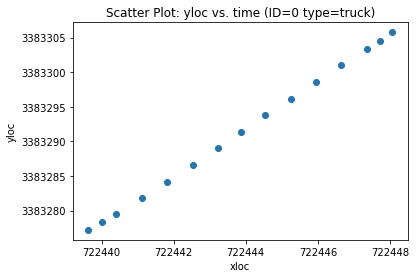

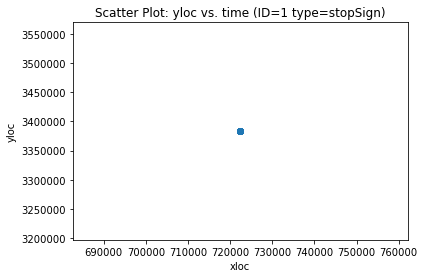

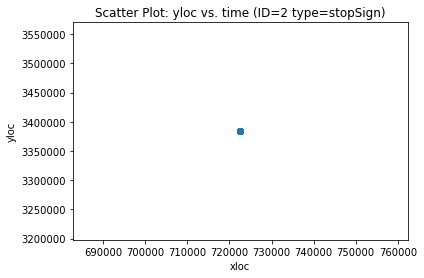

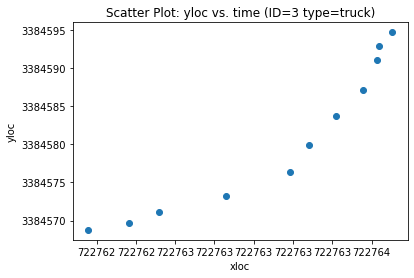

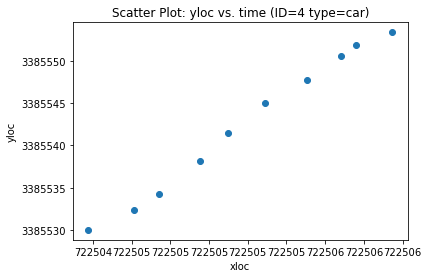

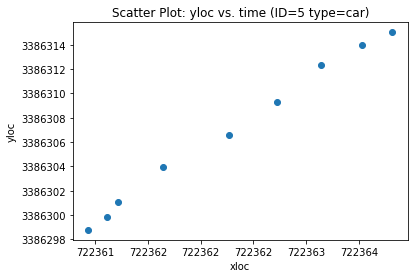

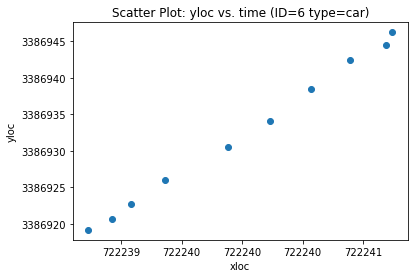

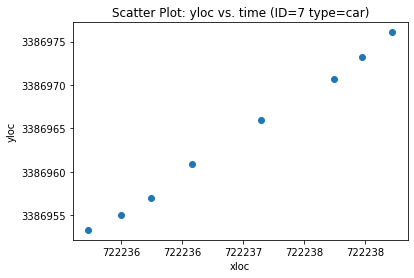

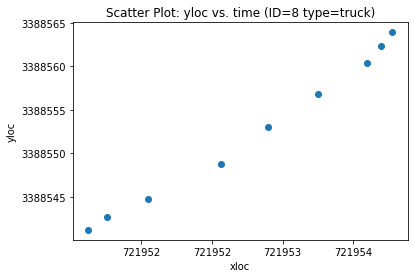

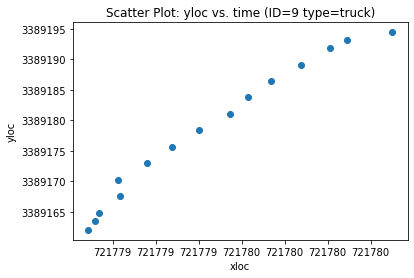

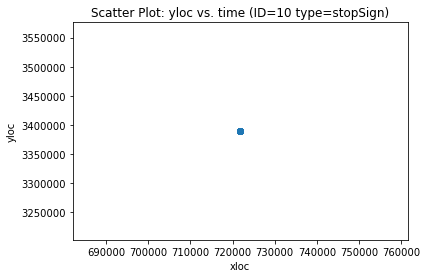

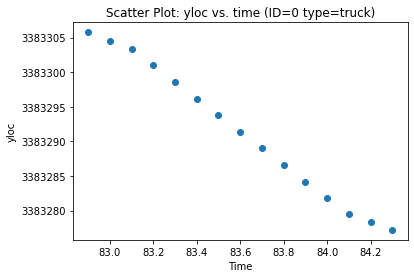

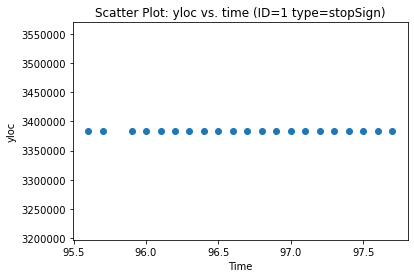

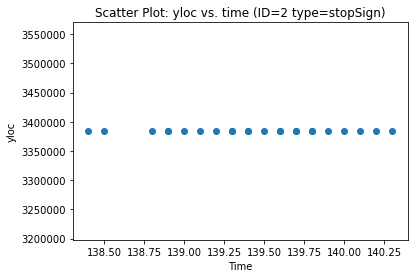

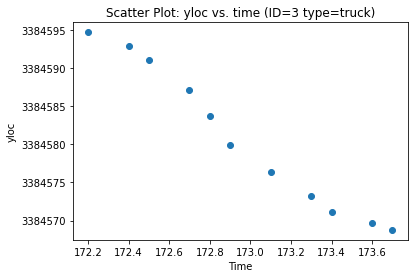

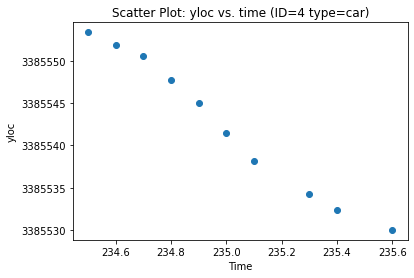

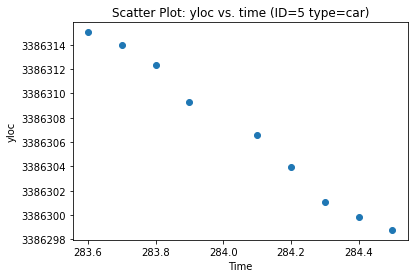

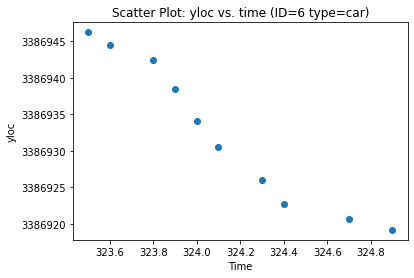

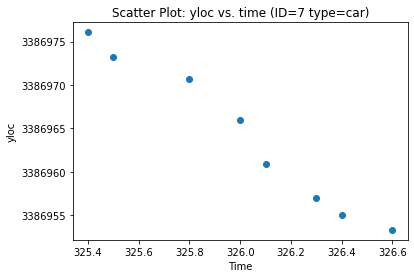

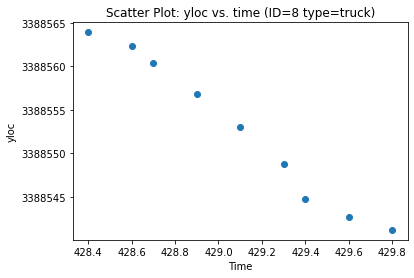

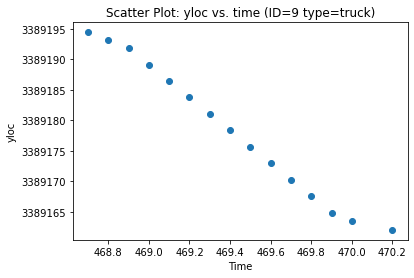

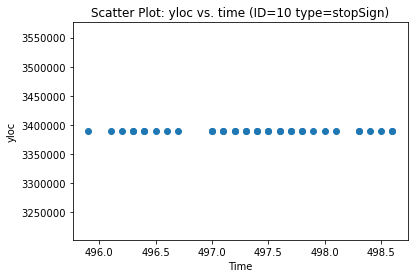

In [115]:
df = pd.read_csv('trajectory_smoothed.csv')

# Group by ID
groups = df.groupby('ID')
outputDir = 'yolo_smoothed_plt/'
os.makedirs(outputDir, exist_ok=True)

for id, group in groups:
    fig, ax = plt.subplots()
    ax.scatter(group['xloc'], group['yloc'])
    ax.set_xlabel('xloc')
    ax.set_ylabel('yloc')
    ax.set_title(f'Scatter Plot: yloc vs. time (ID={id} type={group["type"].iloc[0]})')

    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%1.f"%x))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%1.f"%x))

    plt.savefig(f'{outputDir}x-y-{id}-{group["type"].iloc[0]}.png', dpi=300)


# Task 1: Scatter plot yloc vs. time for each ID
for id, group in groups:
    fig, ax = plt.subplots()
    ax.scatter(group['time'], group['yloc'])
    ax.set_xlabel('Time')
    ax.set_ylabel('yloc')
    ax.set_title(f'Scatter Plot: yloc vs. time (ID={id} type={group["type"].iloc[0]})')

    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%1.f"%x))

    plt.savefig(f'{outputDir}y-t-{id}-{group["type"].iloc[0]}.png', dpi=300)


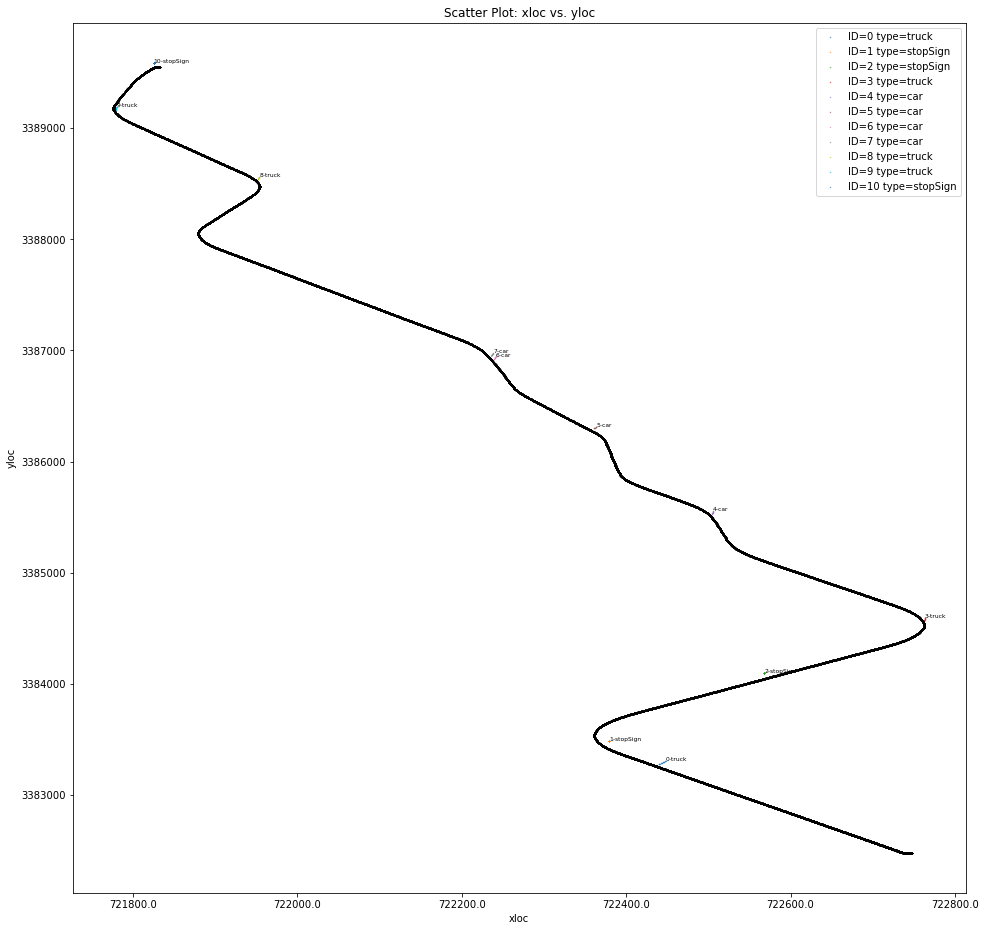

In [117]:
# Read the CSV file into a DataFrame
df = pd.read_csv('trajectory_smoothed.csv')
ego_df = pd.read_csv('utm_corr.csv')

# Group by ID
groups = df.groupby('ID')
# outputDir = 'yolo_raw_plt/'
# os.makedirs(outputDir, exist_ok=True)

fig, ax = plt.subplots(figsize=(16,16))
for id, group in df.groupby('ID'):
    ax.scatter(group['xloc'], group['yloc'], label=f'ID={id} type={group["type"].iloc[0]}',s=0.1)
    # Add text label to the first point of each ID
    x = group['xloc'].iloc[0]
    y = group['yloc'].iloc[0]
    ax.text(x, y, f'{id}-{group["type"].iloc[0]}', fontsize=6)

ax.set_xlabel('xloc')
ax.set_ylabel('yloc')
ax.set_title('Scatter Plot: xloc vs. yloc')
ax.legend()

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%0.1f"%x))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:"%1.f"%x))

ax.scatter(ego_df['position_x'],ego_df['position_y'],color ='black', s=0.1)

plt.savefig('smoothed-x-y.png',dpi=300)
plt.show()

In [118]:
# Read the original CSV file
data = pd.read_csv("trajectory_smoothed.csv")

# Split the data into groups based on 'ID'
groups = data.groupby('ID')

# Iterate over the groups
for group_name, group_data in groups:
    # Extract the 'type' value from the first row of the group
    group_type = group_data.iloc[0]['type']
    
    # Generate the output filename
    output_filename = f"{group_name}-{group_type}.csv"
    
    # Save the group data to a new CSV file
    group_data.to_csv(output_filename, index=False)